### Importing the libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [116]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

### Implementing Thompson Sampling

In [117]:
import random

N = df.shape[0]
d = df.shape[1]
ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0

for n in range(N):
    ad = 0
    max_random_beta = 0
    for i in range(d):
        random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
        if random_beta > max_random_beta:
            max_random_beta = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.iloc[n, ad]
    if reward == 1:
        number_of_rewards_1[ad] += 1
    else:
        number_of_rewards_0[ad] += 1
    total_reward += reward

### Visualising the results

Text(0, 0.5, 'Number of times each ad was selected by the algorithm')

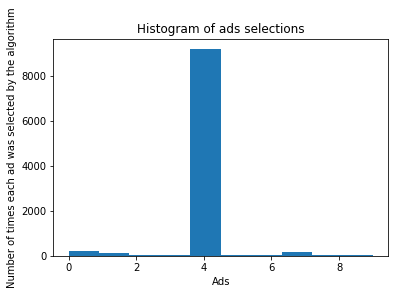

In [118]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected by the algorithm')

In [119]:
from collections import Counter
Counter(ads_selected)

Counter({8: 49,
         1: 120,
         5: 38,
         0: 223,
         4: 9178,
         9: 45,
         3: 61,
         7: 189,
         6: 46,
         2: 51})